In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [83]:
df.shape

(200, 5)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [85]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [86]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

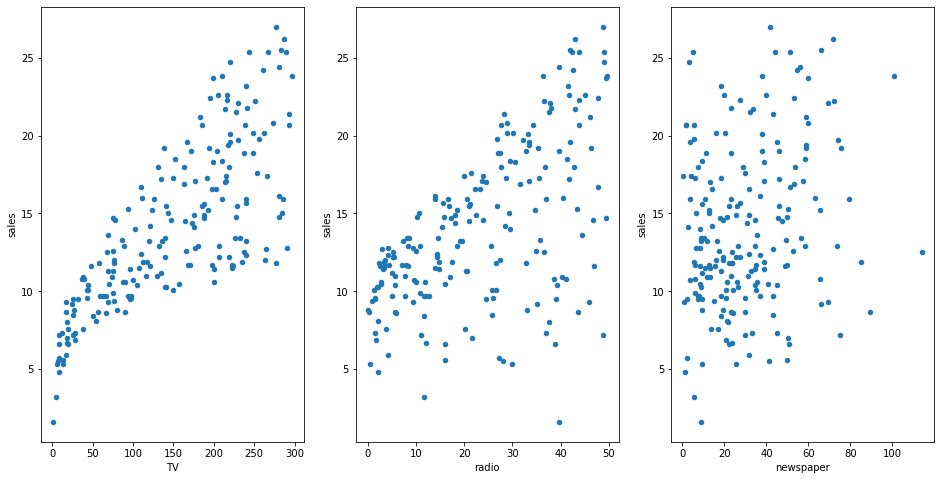

In [87]:
fig,  axs   =plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

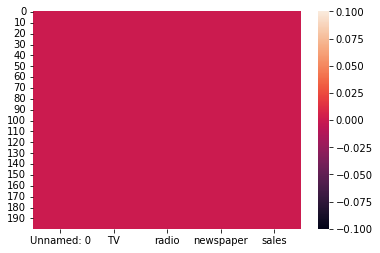

In [88]:
sns.heatmap(df.isnull())
plt.show()

## Remove-out skewness

In [89]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [90]:
from scipy.stats import boxcox

In [91]:
df['newspaper']=boxcox(df['newspaper'],.5)

In [92]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.062388
sales         0.407571
dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


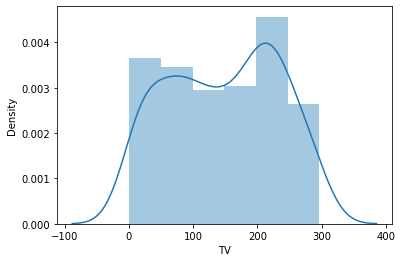

In [93]:
sns.distplot(df['TV'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


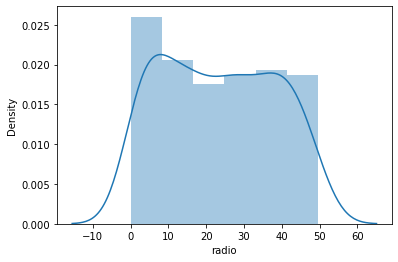

In [94]:
sns.distplot(df['radio'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


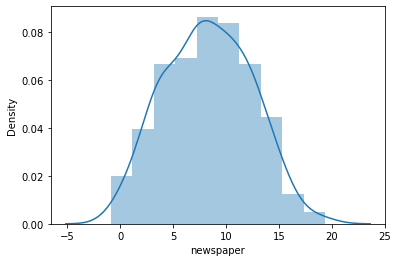

In [95]:
sns.distplot(df['newspaper'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


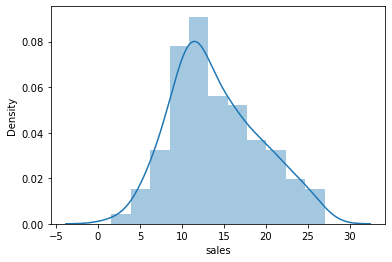

In [96]:
sns.distplot(df['sales'])
plt.show()

In [97]:
data=df.drop('Unnamed: 0',axis=1)

In [98]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,14.637307,22.1
1,44.5,39.3,11.431307,10.4
2,17.2,45.9,14.649324,9.3
3,151.5,41.3,13.297059,18.5
4,180.8,10.8,13.283979,12.9
...,...,...,...,...
195,38.2,3.7,5.429670,7.6
196,94.2,4.9,3.692100,9.7
197,177.0,9.3,3.059644,12.8
198,283.6,42.0,14.272676,25.5


## Remove-out Outliers

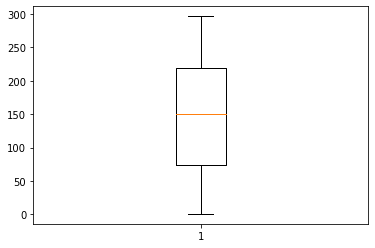

In [99]:
plt.boxplot(df['TV'])
plt.show()

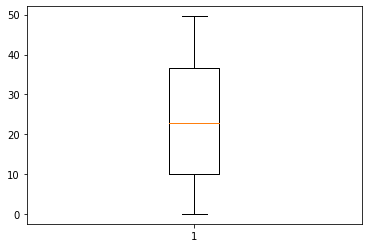

In [100]:
plt.boxplot(df['radio'])
plt.show()

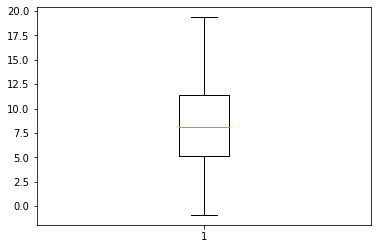

In [101]:
plt.boxplot(df['newspaper'])
plt.show()

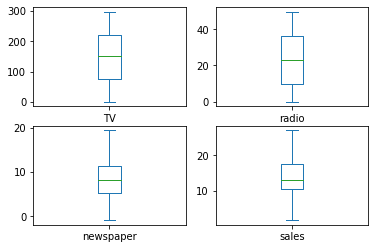

In [102]:
data.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

## Correlation

In [107]:
corr=data.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.045976,0.782224
radio,0.054809,1.000000,0.313430,0.576223
newspaper,0.045976,0.313430,1.000000,0.204725
sales,0.782224,0.576223,0.204725,1.000000


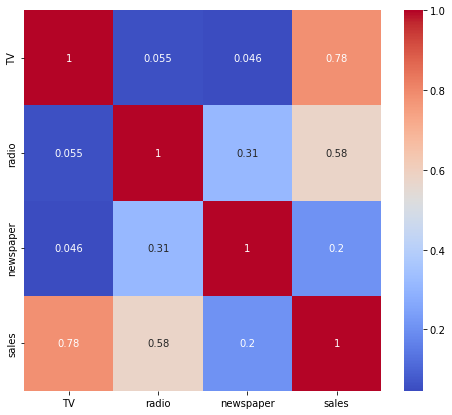

In [109]:
figure=plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [112]:
x=data.drop('sales',axis=1)
y=data['sales']

## Train_Test_Split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)


In [115]:
x_train.shape,x_test.shape

((160, 3), (40, 3))

## Linear Regression Algorithm


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [117]:
lr=LinearRegression()

In [120]:
lr.fit(x_train,y_train)

LinearRegression()

In [121]:
pred=lr.predict(x_test)

In [129]:
print("mean_sqaure_error",mean_squared_error(pred,y_test))
print("mean_absolute_error",mean_absolute_error(pred,y_test))
print("r2_score",r2_score(pred,y_test))

mean_sqaure_error 2.4818110037902583
mean_absolute_error 1.1799005594843874
r2_score 0.9029013556207331


In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
score=cross_val_score(lr,x,y,cv=5)

In [128]:
print(score)
print(score.mean())
print(score.std())

[0.87809171 0.91744186 0.92982697 0.81591747 0.89538764]
0.8873331295445761
0.039906735613166835


## Ridge

In [130]:
from sklearn.linear_model import Ridge


In [131]:
rd=Ridge()


In [132]:
rd.fit(x_train,y_train)


Ridge()

In [133]:
pred=rd.predict(x_test)


In [134]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 2.4817484621096404
mean absolute error 1.1798931449403516
r2 score 0.902901639692439


In [135]:
score=cross_val_score(rd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87809339 0.91744187 0.92982721 0.81592601 0.895384  ]
0.8873344978853581
0.0399035061070375


## Lasso

In [136]:
from sklearn.linear_model import Lasso


In [137]:
ls=Lasso()


In [138]:
ls.fit(x_train,y_train)


Lasso()

In [139]:
pred=ls.predict(x_test)


In [140]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 2.4172397945943147
mean_absolute_error 1.1647724929523995
r2_score 0.9199167841812638


In [141]:
score=cross_val_score(ls,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88159827 0.91792464 0.93002502 0.82370663 0.89241677]
0.8891342630412222
0.03701156844891968


In [142]:
from sklearn.linear_model import ElasticNet

In [143]:
en=ElasticNet()

In [144]:
en.fit(x_train,y_train)

ElasticNet()

In [145]:
pred=en.predict(x_test)

In [146]:
print('mean_squared_error',mean_squared_error(pred,y_test))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 2.430905139711084
mean_absolute_error 1.1661329267978424
r2_score 0.9194640509502988


In [147]:
score=cross_val_score(en,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88145684 0.91806469 0.92996988 0.82306879 0.89365928]
0.889243894546299
0.037278740405920247


## support vector machine


In [148]:
from sklearn.svm import SVR


In [149]:
svr=SVR()


In [150]:
svr.fit(x_train,y_train)


SVR()

In [151]:
pred=svr.predict(x_test)


In [152]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 4.563945346162763
mean_absolute_error 1.5072063558772186
r2_score 0.848796374708447


In [153]:
score=cross_val_score(svr,x,y,cv=5)


In [154]:
print(score)
print(score.mean())
print(score.std())

[0.85316592 0.88027864 0.82461163 0.84955315 0.7850179 ]
0.8385254476399322
0.0320497551480332


## Decision Tree Regressor

In [155]:
from sklearn.tree import DecisionTreeRegressor


In [156]:
dtr=DecisionTreeRegressor()


In [158]:
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [159]:
pred=dtr.predict(x_test)

In [160]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 1.8567500000000006
mean_absolute_error 1.0525000000000002
r2_score 0.938485825318628


In [161]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.96785953 0.96409919 0.95567612 0.94304406 0.95926636]
0.9579890515091506
0.008545105567983617


## RandomForest Regressor



In [164]:
from sklearn.ensemble import RandomForestRegressor


In [165]:
rf=RandomForestRegressor()


In [166]:
rf.fit(x_train,y_train)


RandomForestRegressor()

In [167]:
pred=rf.predict(x_test)


In [168]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))  
print('r2 score',r2_score(pred,y_test))

mean_squared_error 0.42914425000000034
mean_absolute_error 0.5323500000000003
r2 score 0.9855834374471731


In [169]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95340938 0.9526133  0.95286757 0.94974677 0.96342305]
0.9544120123767573
0.004681649855300671


## Hyperparameter Tuning

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
from sklearn.model_selection import GridSearchCV


In [190]:
model=RandomForestRegressor()


In [191]:
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}


In [192]:
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)


In [193]:
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})

In [194]:
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})
0.9771283077203069
mae
{'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [195]:
import joblib


In [196]:
joblib.dump(RandomForestRegressor,'Advertisement_sales.obj')

['Advertisement_sales.obj']